# Intro to ANN with Keras

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

X = iris.data[:, (2,3)]
y = (iris.target==0).astype(np.int)

In [3]:
per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

In [4]:
y_pred

array([0])

# Implementation with Keras

In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [6]:
tf.__version__

'2.3.0'

In [7]:
keras.__version__

'2.4.0'

In [8]:
fashion_mnist = keras.datasets.fashion_mnist

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_train_full.dtype

dtype('uint8')

In [12]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Coat


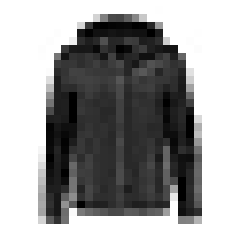

In [14]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off');
print(class_names[y_train[0]])

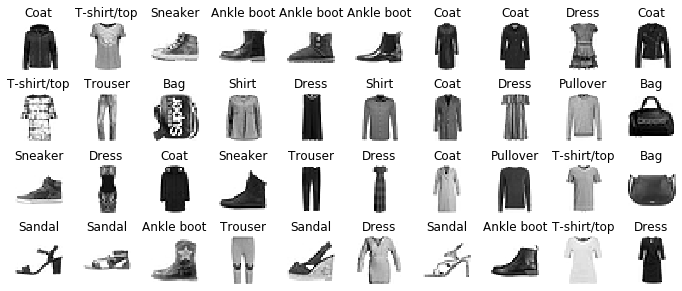

In [15]:
n_rows = 4
n_cols= 10

plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

## Multilayer perceptron model

In [16]:
# keras.backend.clear_session()
# np.random.seed(42)
# tf.random.set_seed(42)

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
# adding layers using a list
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.layers

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [22]:
# model.get_layer('dense_9') is hidden1

In [23]:
weights, biases = hidden1.get_weights()
weights

array([[-0.0672446 , -0.02822134,  0.00649988, ..., -0.04631916,
         0.04177238, -0.07074681],
       [ 0.02667674,  0.07353324, -0.05142292, ..., -0.04937787,
         0.00712455, -0.0271049 ],
       [-0.01653627, -0.06902496,  0.06519833, ...,  0.06239122,
         0.04995411, -0.07338233],
       ...,
       [-0.02261931, -0.04378673, -0.06543154, ...,  0.02053036,
         0.01856488, -0.01622948],
       [-0.03006717,  0.06160516, -0.02862989, ...,  0.05239615,
        -0.03194094, -0.0380968 ],
       [-0.05667463, -0.05178237, -0.04609937, ..., -0.04734327,
         0.05761428,  0.04821853]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer='sgd', metrics=['accuracy'])

In [28]:
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7075 - accuracy: 0.7664 - val_loss: 0.5256 - val_accuracy: 0.8262
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4851 - accuracy: 0.8323 - val_loss: 0.4478 - val_accuracy: 0.8484
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4406 - accuracy: 0.8465 - val_loss: 0.4073 - val_accuracy: 0.8638
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4146 - accuracy: 0.8549 - val_loss: 0.3973 - val_accuracy: 0.8628
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3948 - accuracy: 0.8618 - val_loss: 0.4189 - val_accuracy: 0.8508
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3794 - accuracy: 0.8667 - val_loss: 0.3703 - val_accuracy: 0.8690
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3650 - accuracy: 0.8714 - val_loss: 0.3637 - val_accuracy:

In [29]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [30]:
history.history

{'loss': [0.7075474858283997,
  0.4851256310939789,
  0.44056519865989685,
  0.41456708312034607,
  0.39481666684150696,
  0.37935400009155273,
  0.3649548292160034,
  0.3519834280014038,
  0.34195759892463684,
  0.3322652280330658],
 'accuracy': [0.7663818001747131,
  0.8322908878326416,
  0.8464545607566833,
  0.8549090623855591,
  0.8618363738059998,
  0.8667091131210327,
  0.8713818192481995,
  0.8754727244377136,
  0.8805272579193115,
  0.8822363615036011],
 'val_loss': [0.5255743861198425,
  0.44783565402030945,
  0.407307893037796,
  0.3973327577114105,
  0.4188865125179291,
  0.37029874324798584,
  0.3637027144432068,
  0.35268279910087585,
  0.3508549928665161,
  0.34479427337646484],
 'val_accuracy': [0.826200008392334,
  0.8483999967575073,
  0.8637999892234802,
  0.8628000020980835,
  0.8507999777793884,
  0.8690000176429749,
  0.8737999796867371,
  0.8781999945640564,
  0.8763999938964844,
  0.8790000081062317]}

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

(0, 1)

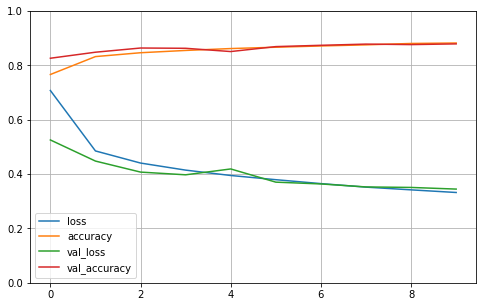

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 66.7126 - accuracy: 0.8360


[66.71257781982422, 0.8360000252723694]

In [34]:
X_new = X_test[:3]
X_new.shape

(3, 28, 28)

In [35]:
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

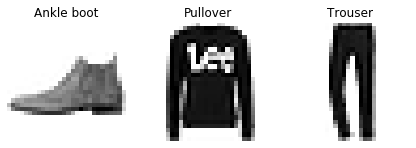

In [38]:
plt.figure(figsize=(3*2.4, 1*2.4))
for idx, image in enumerate(X_new):
    plt.subplot(1, 3, idx+1)
    plt.imshow(image, cmap='binary',interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_test[idx]])

plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [39]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
tf.random.set_seed(42)

In [40]:
housing = fetch_california_housing()

In [41]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# model.compile(loss='mean_squared_error', optimizer='sgd')
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4875 - val_loss: 0.4656

In [44]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4212
0.4211779236793518


In [45]:
X_new = X_test[:3]
X_new.shape

(3, 8)

In [46]:
y_pred = model.predict(X_new)
y_pred

array([[0.3885665],
       [1.6792021],
       [3.1022792]], dtype=float32)

In [47]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

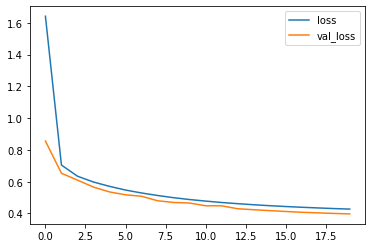

In [48]:
pd.DataFrame(history.history).plot()

# Complex models using Functional API

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

In [51]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_9[0][0]         

In [52]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
print(mse_test)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4659 - val_loss: 0.4313

# Different inputs via deep and shallow parts

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')

hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)

model= keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [55]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, 
                   validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
print(mse_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4644 - val_loss: 0.4315

# Aux output for regularization

In [56]:
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')

hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, input_B])

output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [57]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [58]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
                   validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 4.1233 - main_output_loss: 4.1070 - aux_output_loss: 4.2699 - val_loss: 4.6962 - val_main_output_loss: 4.2781 - val_aux_output_loss: 8.4591
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5618 - main_output_loss: 1.3958 - aux_output_loss: 3.0558 - val_loss: 2.9504 - val_main_output_loss: 2.1815 - val_aux_output_loss: 9.8700
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0028 - main_output_loss: 0.8527 - aux_output_loss: 2.3533 - val_loss: 2.4689 - val_main_output_loss: 1.5745 - val_aux_output_loss: 10.5184
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8232 - main_output_loss: 0.6978 - aux_output_loss: 1.9520 - val_loss: 2.1756 - val_main_output_loss: 1.2900 - val_aux_output_loss: 10.1464
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7549 - main_output_loss: 0.6478 - aux_output_loss: 1.7188 - val_lo

In [59]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
print(y_pred_main, y_pred_aux)

162/162 [==============================] - 0s 1ms/step - loss: 0.6084 - main_output_loss: 0.5504 - aux_output_loss: 1.1305
[[0.84648037]
 [1.684804  ]
 [2.679947  ]] [[1.0609034]
 [1.5629395]
 [2.122662 ]]


# Dynamic Models

In [60]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation='relu',**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel(30, activation='relu')

In [61]:
# class WideAndDeepModel(keras.models.Model):
#     def __init__(self, units=30, activation="relu", **kwargs):
#         super().__init__(**kwargs)
#         self.hidden1 = keras.layers.Dense(units, activation=activation)
#         self.hidden2 = keras.layers.Dense(units, activation=activation)
#         self.main_output = keras.layers.Dense(1)
#         self.aux_output = keras.layers.Dense(1)
        
#     def call(self, inputs):
#         input_A, input_B = inputs
#         hidden1 = self.hidden1(input_B)
#         hidden2 = self.hidden2(hidden1)
#         concat = keras.layers.concatenate([input_A, hidden2])
#         main_output = self.main_output(concat)
#         aux_output = self.aux_output(hidden2)
#         return main_output, aux_output

# model = WideAndDeepModel(30, activation="relu")

In [62]:
model.compile(loss='mse', loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [63]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10, 
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.5964 - val_

In [64]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

162/162 [==============================] - 0s 1ms/step - loss: 0.5841 - output_1_loss: 0.5188 - output_2_loss: 1.1722


# Saving and Restoring

In [65]:
np.random.seed(42)
tf.random.set_seed(42)

In [66]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [67]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 962us/step - loss: 0.4382


In [68]:
model.save('my_keras_model.h5')

In [69]:
model = keras.models.load_model('my_keras_model.h5')

# Using Callbacks

In [70]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_loss: 0.4379

In [72]:
model = keras.models.load_model('my_keras_model.h5')
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 895us/step - loss: 0.4382


0.438228577375412

In [73]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])

mse_test = model.evaluate(X_test, y_test)
print(mse_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3976 - val_lo

In [74]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
        
val_train_ratio_cb = PrintValTrainRatioCallback()        
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid),
                   callbacks=[val_train_ratio_cb])

Epoch 1/3
323/363 [=========================>....] - ETA: 0s - loss: 0.3299
val/train: 1.08
363/363 [==============================] - 1s 2ms/step - loss: 0.3302 - val_loss: 0.3557
Epoch 2/3
334/363 [==========================>...] - ETA: 0s - loss: 0.3280
val/train: 1.00
363/363 [==============================] - 1s 1ms/step - loss: 0.3301 - val_loss: 0.3303
Epoch 3/3
358/363 [============================>.] - ETA: 0s - loss: 0.3290
val/train: 1.02
363/363 [==============================] - 0s 1ms/step - loss: 0.3296 - val_loss: 0.3347


# Using TensorBoard for Visualization

In [75]:
import os

root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()


In [76]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [77]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [78]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=30, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, tensorboard_cb]
                   )

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 7.8215WARNING:tensorflow:From /home/umesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==========================

In [79]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 95799), started 19:02:19 ago. (Use '!kill 95799' to kill it.)

# Hyperparameter tuning

In [80]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [81]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [82]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [83]:
keras_reg.fit(X_train, y_train, epochs=10,
             validation_data=(X_train, y_train), 
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.0896 - val_loss: 0.8011
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7606 - val_loss: 0.5791
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5456 - val_loss: 0.4890
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4732 - val_loss: 0.4615
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4503 - val_loss: 0.4396
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4338 - val_loss: 0.4274
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4241 - val_loss: 0.4194
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4168 - val_loss: 0.4131
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4108 - val_loss: 0.4073
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4060 - val_loss: 0.4029

In [85]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3998


In [86]:
y_pred = keras_reg.predict(X_new)

In [88]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1, 100),
    'learning_rate': reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=3, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), 
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/10
242/242 [==============================] - 0s 2ms/step - loss: 3.3071 - val_loss: 1.3735
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 0.9782 - val_loss: 0.6881
Epoch 3/10
242/242 [==============================] - 0s 1ms/step - loss: 0.6186 - val_loss: 0.5887
Epoch 4/10
242/242 [==============================] - 0s 1ms/step - loss: 0.5504 - val_loss: 0.5466
Epoch 5/10
242/242 [==============================] - 0s 1ms/step - loss: 0.5363 - val_loss: 0.5360
Epoch 6/10
242/242 [==============================] - 0s 1ms/step - loss: 0.5307 - val_loss: 0.7261
Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5322 - val_loss: 0.6728
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5311 - val_loss: 0.6939
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5326 - val_loss: 0.5351
Epoch 10/10
121/121 [==============================] - 0s 979us/step - loss: 0.5319
Epoch 1/10
242/2

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f00558b27d0>, as the constructor either does not set or modifies parameter learning_rate